In [2]:
import pyupbit
import time
from collections import deque

In [52]:
tickers = []
# 코인 종가를 담을 deque 변수
ma20 = deque(maxlen = 20)
ma60 = deque(maxlen = 60)
ma120 = deque(maxlen = 120)

# 원화로 거래 가능한 코인 리스트
tickers = pyupbit.get_tickers(fiat = 'KRW')
# ['KRW-BTC', 'KRW-ETH', 'KRW-NEO', 'KRW-MTL', 'KRW-LTC'] ... 등등

# 로그인 정보 저장
#upbit = pyupbit.Upbit('', '')

'''get_ohlcv 함수는 고가/시가/저가/종가/거래량을 DataFrame으로 반환합니다'''
df = pyupbit.get_ohlcv(tickers[0], interval='minute1') # 일봉 데이터 프레임 생성

ma20.extend(df['close'])    # ma20 변수에 종가 넣기
ma60.extend(df['close'])    # ma60 변수에 종가 넣기
ma120.extend(df['close'])   # ma120 변수에 종가 넣기

df['date'] = df.index

ma5 = df['close'].rolling(window=5).mean()
df.insert(len(df.columns), "MA5", ma5)

ma20 = df['close'].rolling(window=20).mean()
df.insert(len(df.columns), "MA20", ma20)

ma60 = df['close'].rolling(window=60).mean()
df.insert(len(df.columns), "MA60", ma60)
df

,open,high,low,close,volume,value,date,MA5,MA20,MA60
2022-02-15 08:21:00,51855000.0,51900000.0,51845000.0,51900000.0,0.788554,4.092154e+07,2022-02-15 08:21:00,NaN,NaN,NaN
2022-02-15 08:22:00,51898000.0,51921000.0,51864000.0,51865000.0,0.843898,4.379542e+07,2022-02-15 08:22:00,NaN,NaN,NaN
2022-02-15 08:23:00,51864000.0,51919000.0,51864000.0,51917000.0,0.187535,9.727518e+06,2022-02-15 08:23:00,NaN,NaN,NaN
2022-02-15 08:24:00,51916000.0,51916000.0,51864000.0,51865000.0,0.452446,2.346688e+07,2022-02-15 08:24:00,NaN,NaN,NaN
2022-02-15 08:25:00,51865000.0,51914000.0,51864000.0,51865000.0,0.824003,4.275219e+07,2022-02-15 08:25:00,51882400.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-02-15 11:36:00,52775000.0,52778000.0,52747000.0,52778000.0,1.933342,1.020285e+08,2022-02-15 11:36:00,52731400.0,52687950.0,5.272492e+07
2022-02-15 11:37:00,52778000.0,52779000.0,52708000.0,52710000.0,2.569139,1.354984e+08,2022-02-15 11:37:00,52736200.0,52690100.0,5.272457e+07
2022-02-15 11:38:00,52710000.0,52710000.0,52693000.0,52700000.0,0.837444,4.413650e+07,2022-02-15 11:38:00,52734600.0,52692450.0,5.272257e+07
2022-02-15 11:39:00,52710000.0,52760000.0,52700000.0,52721000.0,6.424144,3.386927e+08,2022-02-15 11:39:00,52731200.0,52695800.0,5.272200e+07


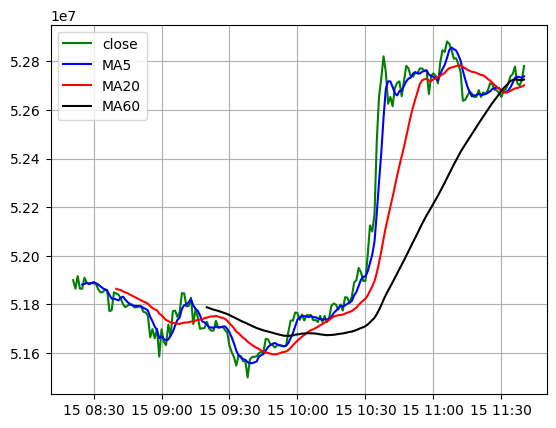

In [57]:

import matplotlib.pyplot as plt
plt.style.use('default')
plt.plot(df['date'], df['close'], 'g', label = 'close')
plt.plot(df['date'], df['MA5'], 'b', label = 'MA5')
plt.plot(df['date'], df['MA20'], 'r', label = 'MA20')
plt.plot(df['date'], df['MA60'], 'k', label = 'MA60')
plt.legend()
plt.grid()
plt.show()